<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2_n20.csv',
 'data_multi_delta_-2_n30.csv',
 'data_multi_delta_-2_n60.csv',
 'data_multi_delta_-2_n120.csv',
 'data_multi_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,65.519638,73.910468,37.329545,0.020425,186.780076,186.761648,0.018428
1,0.0,1.0,35.157891,20.579459,32.277148,-0.030604,97.983894,98.012296,-0.028402
2,0.0,2.0,36.687864,28.821690,68.086653,0.008591,143.604798,143.594859,0.009938
3,0.0,3.0,61.428916,54.986372,70.503032,0.008391,196.926711,196.919829,0.006882
4,0.0,4.0,22.309370,87.711359,92.142662,-0.011239,212.152152,212.163047,-0.010895
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.635728,27.647150,73.800005,-0.038957,202.043927,202.083509,-0.039582
249996,999.0,246.0,76.563436,68.975071,24.380652,0.001247,179.920406,179.921655,-0.001250
249997,999.0,247.0,33.759988,47.302958,83.288525,0.004508,174.355980,174.345450,0.010529
249998,999.0,248.0,52.387696,75.985786,90.043604,0.008379,228.425466,228.414964,0.010502


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,65.519638,73.910468,37.329545,0.020425,186.780076,186.761648,0.018428
1,0.0,1.0,35.157891,20.579459,32.277148,-0.030604,97.983894,98.012296,-0.028402
2,0.0,2.0,36.687864,28.821690,68.086653,0.008591,143.604798,143.594859,0.009938
3,0.0,3.0,61.428916,54.986372,70.503032,0.008391,196.926711,196.919829,0.006882
4,0.0,4.0,22.309370,87.711359,92.142662,-0.011239,212.152152,212.163047,-0.010895
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.635728,27.647150,73.800005,-0.038957,202.043927,202.083509,-0.039582
249996,999.0,246.0,76.563436,68.975071,24.380652,0.001247,179.920406,179.921655,-0.001250
249997,999.0,247.0,33.759988,47.302958,83.288525,0.004508,174.355980,174.345450,0.010529
249998,999.0,248.0,52.387696,75.985786,90.043604,0.008379,228.425466,228.414964,0.010502


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    65.519638  73.910468  37.329545  0.020425  186.780076   
      1.0    35.157891  20.579459  32.277148 -0.030604   97.983894   
      2.0    36.687864  28.821690  68.086653  0.008591  143.604798   
      3.0    61.428916  54.986372  70.503032  0.008391  196.926711   
      4.0    22.309370  87.711359  92.142662 -0.011239  212.152152   
...                ...        ...        ...       ...         ...   
999.0 245.0  90.635728  27.647150  73.800005 -0.038957  202.043927   
      246.0  76.563436  68.975071  24.380652  0.001247  179.920406   
      247.0  33.759988  47.302958  83.288525  0.004508  174.355980   
      248.0  52.387696  75.985786  90.043604  0.008379  228.425466   
      249.0  48.355174  62.515433  27.268084  0.013486  148.152176   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    186.761648  0.018428  
      1.0     98.012296 -0.028402  
      2.0    143.594859  0.009938  
      3.0    196.919829  0.006882  
      4.0    212.163047 -0.010895  
...                 ...       ...  
999.0 245.0  202.083509 -0.039582  
      246.0  179.921655 -0.001250  
      247.0  174.345450  0.010529  
      248.0  228.414964  0.010502  
      249.0  148.137020  0.015156  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    65.519638  73.910468  37.329545  0.020425  186.780076   
      1.0    35.157891  20.579459  32.277148 -0.030604   97.983894   
      2.0    36.687864  28.821690  68.086653  0.008591  143.604798   
      3.0    61.428916  54.986372  70.503032  0.008391  196.926711   
      4.0    22.309370  87.711359  92.142662 -0.011239  212.152152   
...                ...        ...        ...       ...         ...   
999.0 245.0  90.635728  27.647150  73.800005 -0.038957  202.043927   
      246.0  76.563436  68.975071  24.380652  0.001247  179.920406   
      247.0  33.759988  47.302958  83.288525  0.004508  174.355980   
      248.0  52.387696  75.985786  90.043604  0.008379  228.425466   
      249.0  48.355174  62.515433  27.268084  0.013486  148.152176   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    186.761648  0.018428  
      1.0     98.012296 -0.028402  
      2.0    143.594859  0.009938  
      3.0    196.919829  0.006882  
      4.0    212.163047 -0.010895  
...                 ...       ...  
999.0 245.0  202.083509 -0.039582  
      246.0  179.921655 -0.001250  
      247.0  174.345450  0.010529  
      248.0  228.414964  0.010502  
      249.0  148.137020  0.015156  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,65.519638,73.910468,37.329545,0.020425,186.780076,186.761648,0.018428
1,0.0,1.0,35.157891,20.579459,32.277148,-0.030604,97.983894,98.012296,-0.028402
2,0.0,2.0,36.687864,28.821690,68.086653,0.008591,143.604798,143.594859,0.009938
3,0.0,3.0,61.428916,54.986372,70.503032,0.008391,196.926711,196.919829,0.006882
4,0.0,4.0,22.309370,87.711359,92.142662,-0.011239,212.152152,212.163047,-0.010895
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.635728,27.647150,73.800005,-0.038957,202.043927,202.083509,-0.039582
249996,999.0,246.0,76.563436,68.975071,24.380652,0.001247,179.920406,179.921655,-0.001250
249997,999.0,247.0,33.759988,47.302958,83.288525,0.004508,174.355980,174.345450,0.010529
249998,999.0,248.0,52.387696,75.985786,90.043604,0.008379,228.425466,228.414964,0.010502


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    65.519638  73.910468  37.329545  0.020425  186.780076   
      1.0    35.157891  20.579459  32.277148 -0.030604   97.983894   
      2.0    36.687864  28.821690  68.086653  0.008591  143.604798   
      3.0    61.428916  54.986372  70.503032  0.008391  196.926711   
      4.0    22.309370  87.711359  92.142662 -0.011239  212.152152   
...                ...        ...        ...       ...         ...   
999.0 245.0  90.635728  27.647150  73.800005 -0.038957  202.043927   
      246.0  76.563436  68.975071  24.380652  0.001247  179.920406   
      247.0  33.759988  47.302958  83.288525  0.004508  174.355980   
      248.0  52.387696  75.985786  90.043604  0.008379  228.425466   
      249.0  48.355174  62.515433  27.268084  0.013486  148.152176   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    186.761648  0.018428  
      1.0     98.012296 -0.028402  
      2.0    143.594859  0.009938  
      3.0    196.919829  0.006882  
      4.0    212.163047 -0.010895  
...                 ...       ...  
999.0 245.0  202.083509 -0.039582  
      246.0  179.921655 -0.001250  
      247.0  174.345450  0.010529  
      248.0  228.414964  0.010502  
      249.0  148.137020  0.015156  

[250000 rows x 7 columns]

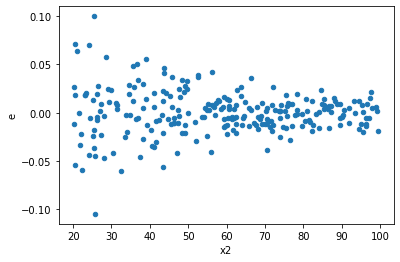

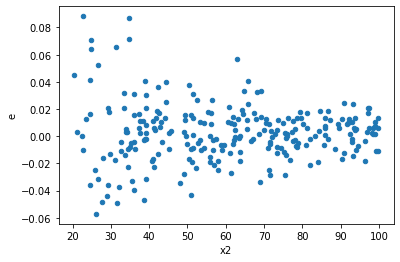

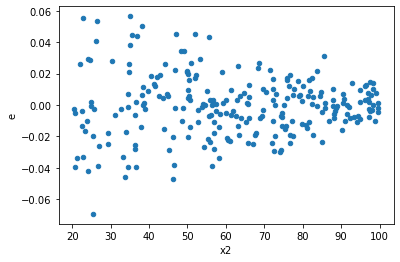

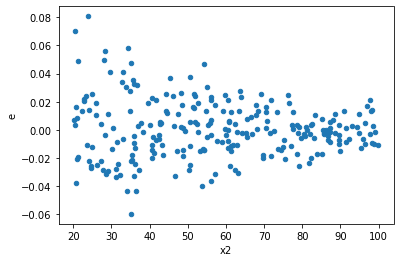

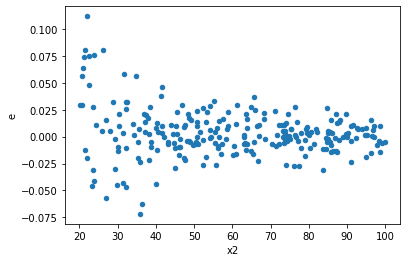

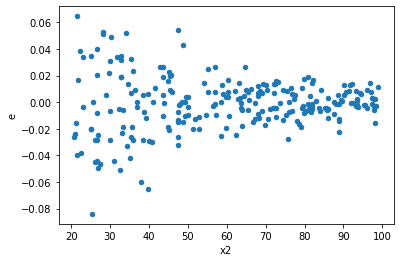

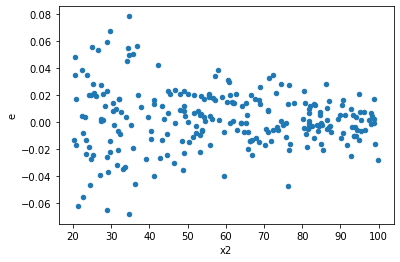

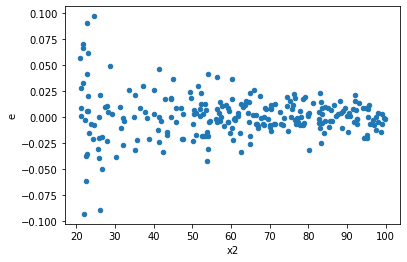

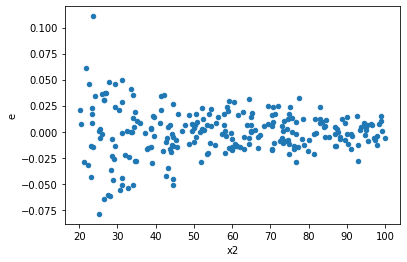

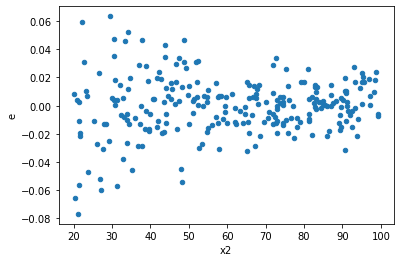

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
249.0,97.0,97.0,0.038843662104509784,0.04580763241553459,0.00040045012478876065,0.0004722436331498411,1.1792820226962144,0.41821630107433183,0.7908918494628341,0.20910815053716592,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,0.0655882677540741,0.027092719410706186,0.0006761677088048876,0.00027930638567738337,0.41307264757001133,1.9110075358621932e-05,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,0.08150204112541024,0.024828965481037177,0.0008402272280970128,0.0002559687162993523,0.3046422535949979,1.3531317518890943e-08,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,0.08822274006646205,0.027606596775205532,0.0009095127841903304,0.0002846040904660364,0.3129192853725499,2.7352757620554104e-08,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,0.04989941116325116,0.018737153638360482,0.0005144269192087749,0.00019316653235423178,0.37549849189722734,2.3583615593180936e-06,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,0.08245385441722675,0.01973716682807643,0.0008500397362600695,0.0002034759466812003,0.23937227637902667,1.435154088157331e-11,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,0.10222963162993931,0.03394519937610599,0.0010539137281437043,0.0003499505090320205,0.3320485346067185,1.2437582342934832e-07,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,0.07550639613639759,0.026181964745931003,0.0007784164550144082,0.00026991716232918557,0.3467516142425195,3.6165985219943615e-07,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,0.053810774704134964,0.027593911128741253,0.0005547502546818038,0.0002844733106055799,0.5127952771626025,0.0011508528866747967,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,0.07335316714119633,0.027757598964365745,0.0007562182179504777,0.00028616081406562625,0.3784103678977567,2.811479877257037e-06,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    977
Reject005=1 : Homoscedasticity       23
Name: Result_test, dtype: int64